In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file_path = '/content/drive/MyDrive/Business_sales_EDA.csv'

df = pd.read_csv(file_path, delimiter=';', encoding='utf-8')

In [4]:
df.head()

,Product ID,Product Position,Promotion,Product Category,Seasonal,Sales Volume,brand,url,name,description,price,currency,terms,section,season,material,origin
0,185102,Aisle,Yes,clothing,Yes,1243,Zara,https://www.zara.com/us/en/basic-puffer-jacket...,BASIC PUFFER JACKET,Puffer jacket made of tear-resistant ripstop f...,78.99,USD,jackets,MAN,Winter,Polyester,Brazil
1,188771,Aisle,Yes,clothing,No,1429,Zara,https://www.zara.com/us/en/tuxedo-jacket-p0889...,TUXEDO JACKET,Straight fit blazer. Pointed lapel collar and ...,14.99,USD,jackets,MAN,Autumn,Cotton,Turkey
2,180176,End-cap,Yes,clothing,Yes,1168,Zara,https://www.zara.com/us/en/slim-fit-suit-jacke...,SLIM FIT SUIT JACKET,Slim fit jacket. Notched lapel collar. Long sl...,71.95,USD,jackets,WOMAN,Autumn,Polyester,Morocco
3,112917,Aisle,Yes,clothing,No,1348,Zara,https://www.zara.com/us/en/stretch-suit-jacket...,STRETCH SUIT JACKET,Slim fit jacket made of viscose blend fabric. ...,30.99,USD,jackets,MAN,Spring,Polyester,China
4,192936,End-cap,Yes,clothing,Yes,1602,Zara,https://www.zara.com/us/en/double-faced-jacket...,DOUBLE FACED JACKET,Jacket made of faux leather faux shearling wit...,22.99,USD,jackets,WOMAN,Winter,Wool Blend,China


In [5]:
df.columns

Index(['Product ID', 'Product Position', 'Promotion', 'Product Category',
       'Seasonal', 'Sales Volume', 'brand', 'url', 'name', 'description',
       'price', 'currency', 'terms', 'section', 'season', 'material',
       'origin'],
      dtype='object')

In [6]:
df.isna().sum()

,0
Product ID,0
Product Position,0
Promotion,0
Product Category,0
Seasonal,0
Sales Volume,0
brand,0
url,0
name,1
description,2


In [7]:
df.dtypes

,0
Product ID,int64
Product Position,object
Promotion,object
Product Category,object
Seasonal,object
Sales Volume,int64
brand,object
url,object
name,object
description,object


In [8]:
df['Product ID'] = df['Product ID'].astype(int)
df['Sales Volume'] = df['Sales Volume'].astype(int)
df['price'] = pd.to_numeric(df['price'], errors='coerce')

In [9]:
import warnings
warnings.filterwarnings("ignore")

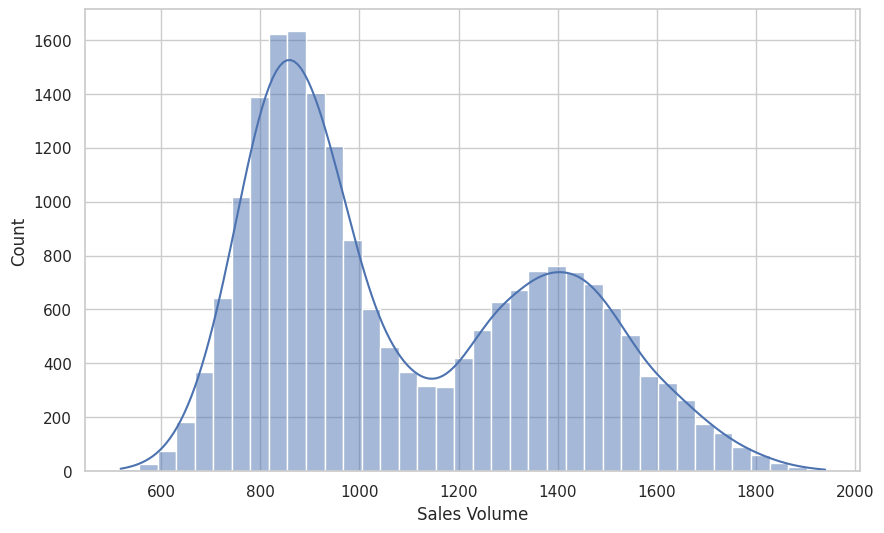

In [10]:
plt.figure(figsize = (10,6))
sns.histplot(data=df,x='Sales Volume',kde = True);

<Figure size 1000x600 with 0 Axes>

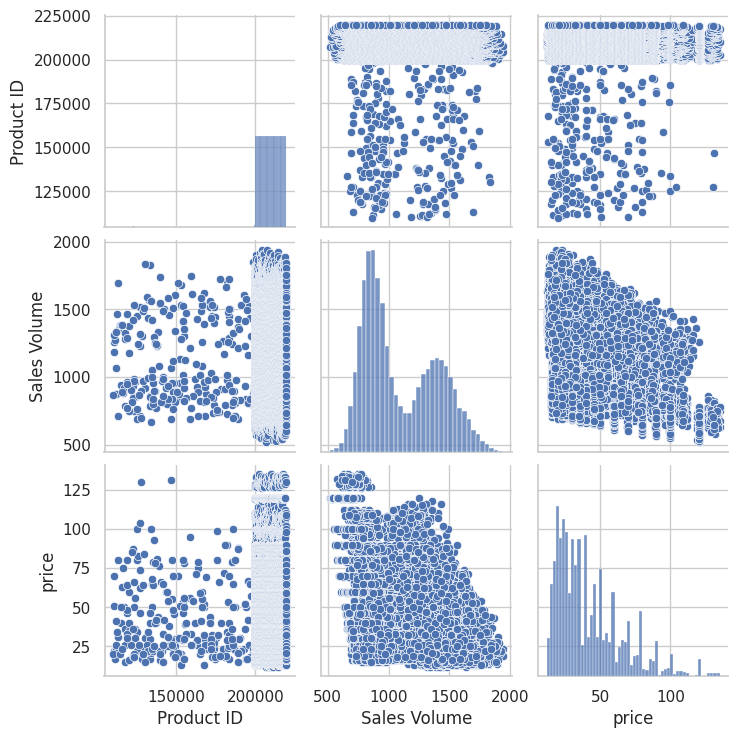

In [11]:
num_cols = ['Product ID', 'Sales Volume','price'];
plt.figure(figsize = (10,6));
sns.pairplot(df[num_cols]);

([0], [Text(0, 0, 'clothing')])

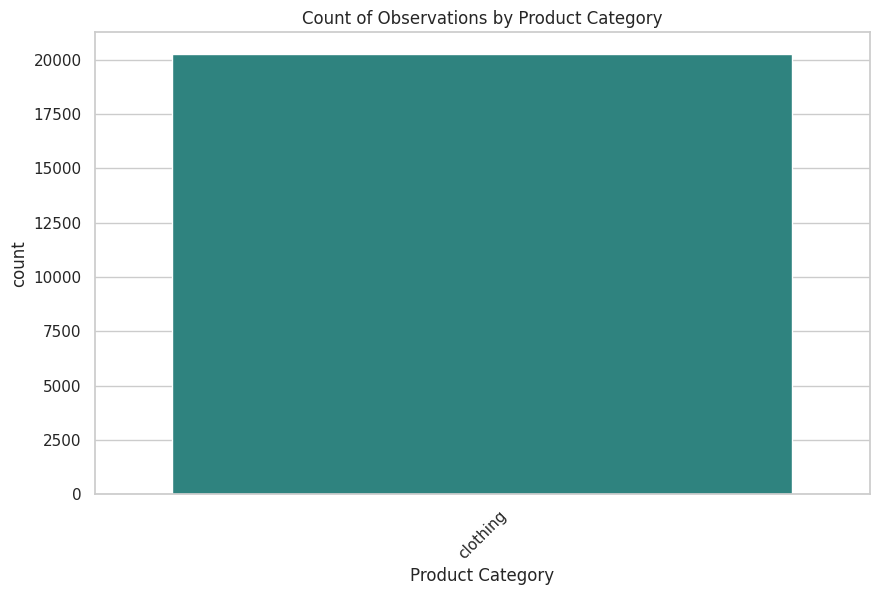

In [12]:
plt.figure(figsize = (10,6))
sns.countplot(data=df, x='Product Category', palette='viridis')
plt.title('Count of Observations by Product Category')
plt.xticks(rotation=45)

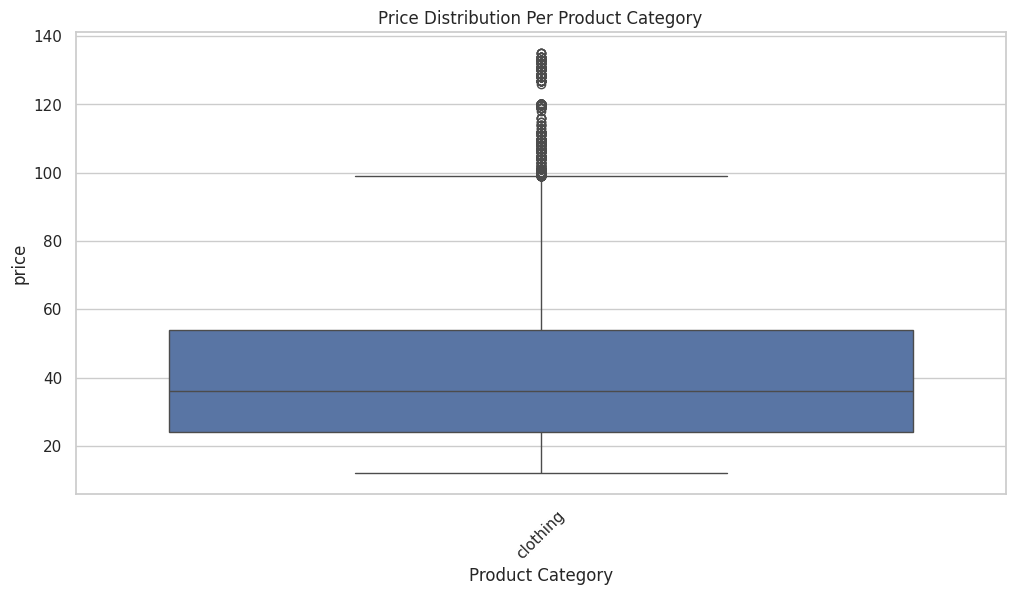

In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Product Category', y='price')
plt.title('Price Distribution Per Product Category')
plt.xticks(rotation=45);

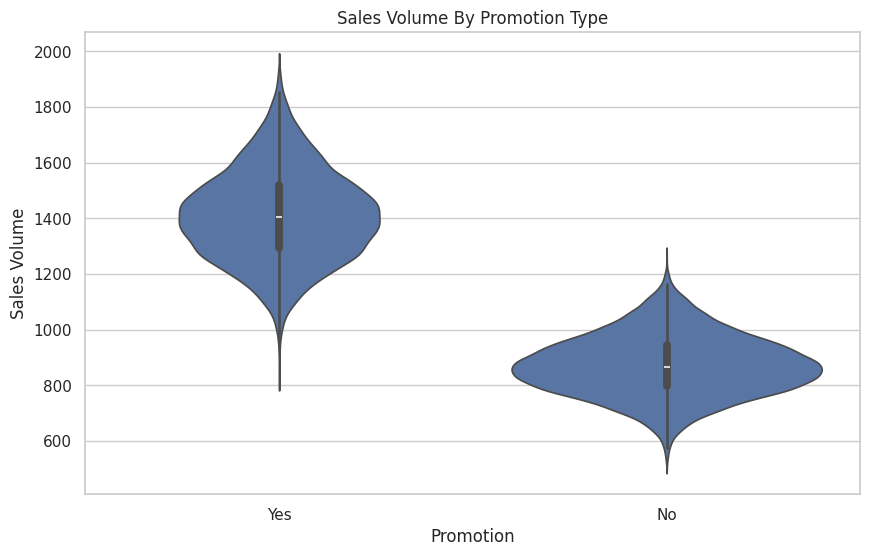

In [14]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Promotion', y='Sales Volume')
plt.title('Sales Volume By Promotion Type');

In [15]:
imp = ['price','Product Category','Promotion','Seasonal']
target = 'Sales Volume'

df_model = df[imp + [target]].copy()
df_model = pd.get_dummies(df_model, columns = ['Product Category','Promotion','Seasonal'],drop_first = True)

In [16]:
df_model = df_model.dropna()

In [17]:
from sklearn.model_selection import train_test_split

x = df_model.drop(columns = [target])
y = df_model[target]

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [18]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train,y_train)
y_preds = model.predict(x_test)

In [19]:
from sklearn.metrics import r2_score , mean_absolute_error

r2 = r2_score(y_test,y_preds)

mae = mean_absolute_error(y_test,y_preds)

print(f'Random Forest Regressor R2 score: {r2:.2f}')
print(f'Random Forest Regressor Mean Absolute Error: {mae:.2f}')

Random Forest Regressor R2 score: 0.86
Random Forest Regressor Mean Absolute Error: 85.08


Text(0.5, 1.0, 'Permutation Importance of Features')

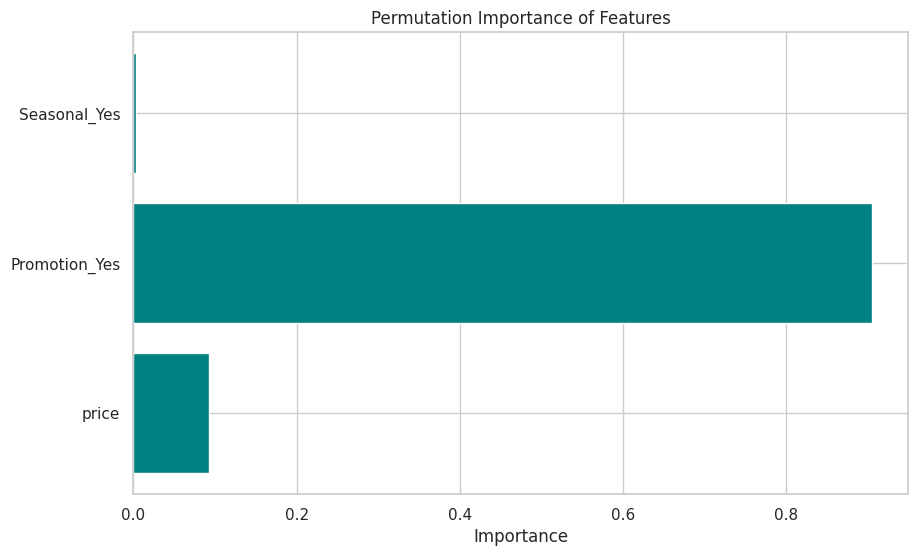

In [20]:
importances = model.feature_importances_
feature_names = x.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances, color='teal')
plt.xlabel('Importance')
plt.title('Permutation Importance of Features')